In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import zscore
from sktime.datasets import load_UCR_UEA_dataset
from aeon.datasets.tsc_datasets import multivariate, multivariate_equal_length, multivariate_unequal_length
from aeon.datasets import get_dataset_meta_data
from src.plot_style import apply_plot_style
apply_plot_style()


In [2]:
print(f"multivariate: {len(multivariate)}")
multivariate

multivariate: 30


['ArticularyWordRecognition',
 'AtrialFibrillation',
 'BasicMotions',
 'CharacterTrajectories',
 'Cricket',
 'DuckDuckGeese',
 'EigenWorms',
 'Epilepsy',
 'EthanolConcentration',
 'ERing',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'InsectWingbeat',
 'JapaneseVowels',
 'Libras',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PenDigits',
 'PEMS-SF',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'SpokenArabicDigits',
 'StandWalkJump',
 'UWaveGestureLibrary']

In [9]:
ts_df = get_dataset_meta_data()
mts_df = ts_df[ts_df["Channels"] > 1]
mts_df

Dataset  TrainSize  TestSize  Length  \
127       ArticularyWordRecognition        275       300     144   
128              AtrialFibrillation         15        15     640   
129                    BasicMotions         40        40     100   
130           CharacterTrajectories       1422      1436       0   
131                         Cricket        108        72    1197   
132                   DuckDuckGeese         60        40     270   
133                      EigenWorms        131       128   17984   
134                        Epilepsy        137       138     207   
135            EthanolConcentration        261       263    1751   
136                           ERing         30       270      65   
137                   FaceDetection       5890      3524      62   
138                 FingerMovements        316       100      50   
139           HandMovementDirection        160        74     400   
140                     Handwriting        150       850     152   
141                       Heartbeat        204       205     405   
142                  InsectWingbeat      25000     25000       0   
143                  JapaneseVowels        270       370      29   
144                          Libras        180       180      45   
145                            LSST       2459      2466      36   
146                    MotorImagery        278       100    3000   
147                          NATOPS        180       180      51   
148                       PenDigits       7494      3498       8   
149                         PEMS-SF        267       173     144   
150                  PhonemeSpectra       3315      3353     217   
151                    RacketSports        151       152      30   
152              SelfRegulationSCP1        268       293     896   
153              SelfRegulationSCP2        200       180    1152   
154              SpokenArabicDigits       6599      2199      93   
155                   StandWalkJump         12        15    2500   
156             UWaveGestureLibrary       2238      2241     315   
160     AsphaltObstaclesCoordinates        390       391       0   
161  AsphaltPavementTypeCoordinates       1055      1056       0   
163                    EyesOpenShut         56        42     128   
165             CounterMovementJump        419       179    4250   
166                         Tiselac      81714     17973      23   
178                     MindReading        727       653     200   
179                  MotionSenseHAR        217       144     200   
180                         EMOPain       1093        50     180   
181                           Blink        500       450     510   
183          WalkingSittingStanding       7352      2947     206   

     NumberClasses     Type  Channels  
127             25   MOTION         9  
128              3      ECG         2  
129              4      HAR         6  
130             20   MOTION         3  
131             12      HAR         6  
132              5    AUDIO      1345  
133              5   MOTION         6  
134              4      HAR         3  
135              4  SPECTRO         3  
136              6      HAR         4  
137              2      EEG       144  
138              2      EEG        28  
139              4      EEG        10  
140             26      HAR         3  
141              2    AUDIO        61  
142             10    AUDIO       200  
143              9    AUDIO        12  
144             15      HAR         2  
145             14    OTHER         6  
146              2      EEG        64  
147              6      HAR        24  
148             10   MOTION         2  
149              7    OTHER       963  
150             39    AUDIO        11  
151              4      HAR         6  
152              2      EEG         6  
153              2      EEG         7  
154             10   SPEECH        13  
155              3      ECG         4  
156              8      HAR         3  

In [22]:
from aeon.datasets import load_classification
dataset_name = "EigenWorms"  # Change to desired dataset
_, y = load_classification(dataset_name, split='train')
class_names = np.unique(y)
print(f"{dataset_name} classes: {class_names}")

EigenWorms classes: ['1' '2' '3' '4' '5']


In [8]:
import yfinance as yf
import pandas as pd

# Define assets (e.g., Tech sector multivariate view)
tickers = ["NVDA", "AAPL", "GOOG", "MSFT", "AMZN", "ORCL", "TSLA", "BRK-B", "MU"]

# Fetch 5-minute data
# period="60d" is the MAXIMUM allowed for interval="5m"
data = yf.download(
    tickers=tickers, 
    period="730d", 
    interval="1h", 
    group_by='ticker', 
    auto_adjust=True
)

# The result is a MultiIndex DataFrame. 
# Let's clean it to get just "Close" prices for all assets:
# This creates a structure: Index=Time, Columns=Tickers
df_close = data.xs("Close", axis=1, level=1)

print(f"Shape: {df_close.shape}")
df_close

[*********************100%***********************]  9 of 9 completed

Shape: (5082, 9)


Ticker                           MSFT        AMZN        AAPL        ORCL  \
Datetime                                                                    
2023-01-19 14:30:00+00:00  232.913406   94.089996  134.449997   86.320000   
2023-01-19 15:30:00+00:00  231.029999   93.159897  134.490005   85.514999   
2023-01-19 16:30:00+00:00  231.020004   93.430000  134.440903   85.589996   
2023-01-19 17:30:00+00:00  232.289993   93.559998  134.750000   86.099998   
2023-01-19 18:30:00+00:00  233.750000   94.375000  135.884995   86.309998   
...                               ...         ...         ...         ...   
2025-12-15 16:30:00+00:00  474.399994  222.544998  274.920013  185.899994   
2025-12-15 17:30:00+00:00  473.619995  222.375000  274.040009  185.615005   
2025-12-15 18:30:00+00:00  474.100006  223.222595  273.369995  185.375000   
2025-12-15 19:30:00+00:00  474.617493  222.664993  273.804993  184.679993   
2025-12-15 20:30:00+00:00  474.820007  222.550003  274.114990  184.850006   

Ticker                             MU        TSLA        GOOG        NVDA  \
Datetime                                                                    
2023-01-19 14:30:00+00:00   55.560001  127.675003   92.860100   17.032001   
2023-01-19 15:30:00+00:00   55.869999  125.239998   93.180000   16.889000   
2023-01-19 16:30:00+00:00   56.209999  125.750000   93.639999   16.884680   
2023-01-19 17:30:00+00:00   56.520000  126.792198   93.730003   16.854000   
2023-01-19 18:30:00+00:00   56.794998  128.280106   93.849998   17.035999   
...                               ...         ...         ...         ...   
2025-12-15 16:30:00+00:00  244.139999  476.989990  306.142609  177.595001   
2025-12-15 17:30:00+00:00  241.979996  475.729614  307.450012  177.125000   
2025-12-15 18:30:00+00:00  240.994003  476.665009  308.540009  177.139999   
2025-12-15 19:30:00+00:00  237.663605  477.868988  309.364990  176.330002   
2025-12-15 20:30:00+00:00  237.500000  475.070007  309.338989  176.229996   

Ticker                          BRK-B  
Datetime                               
2023-01-19 14:30:00+00:00  304.970001  
2023-01-19 15:30:00+00:00  304.709991  
2023-01-19 16:30:00+00:00  305.149994  
2023-01-19 17:30:00+00:00  306.079987  
2023-01-19 18:30:00+00:00  307.059998  
...                               ...  
2025-12-15 16:30:00+00:00  501.755005  
2025-12-15 17:30:00+00:00  502.190002  
2025-12-15 18:30:00+00:00  503.243591  
2025-12-15 19:30:00+00:00  505.035004  
2025-12-15 20:30:00+00:00  506.315002  

[5082 rows x 9 columns]

In [5]:
from importlib import reload
import src.visualization
reload(src.visualization)
from src.visualization import plot_mts_heatmap

c:\Users\wille\OneDrive\Desktop\2025USYD\USYD\mts-spi-study-cluster\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


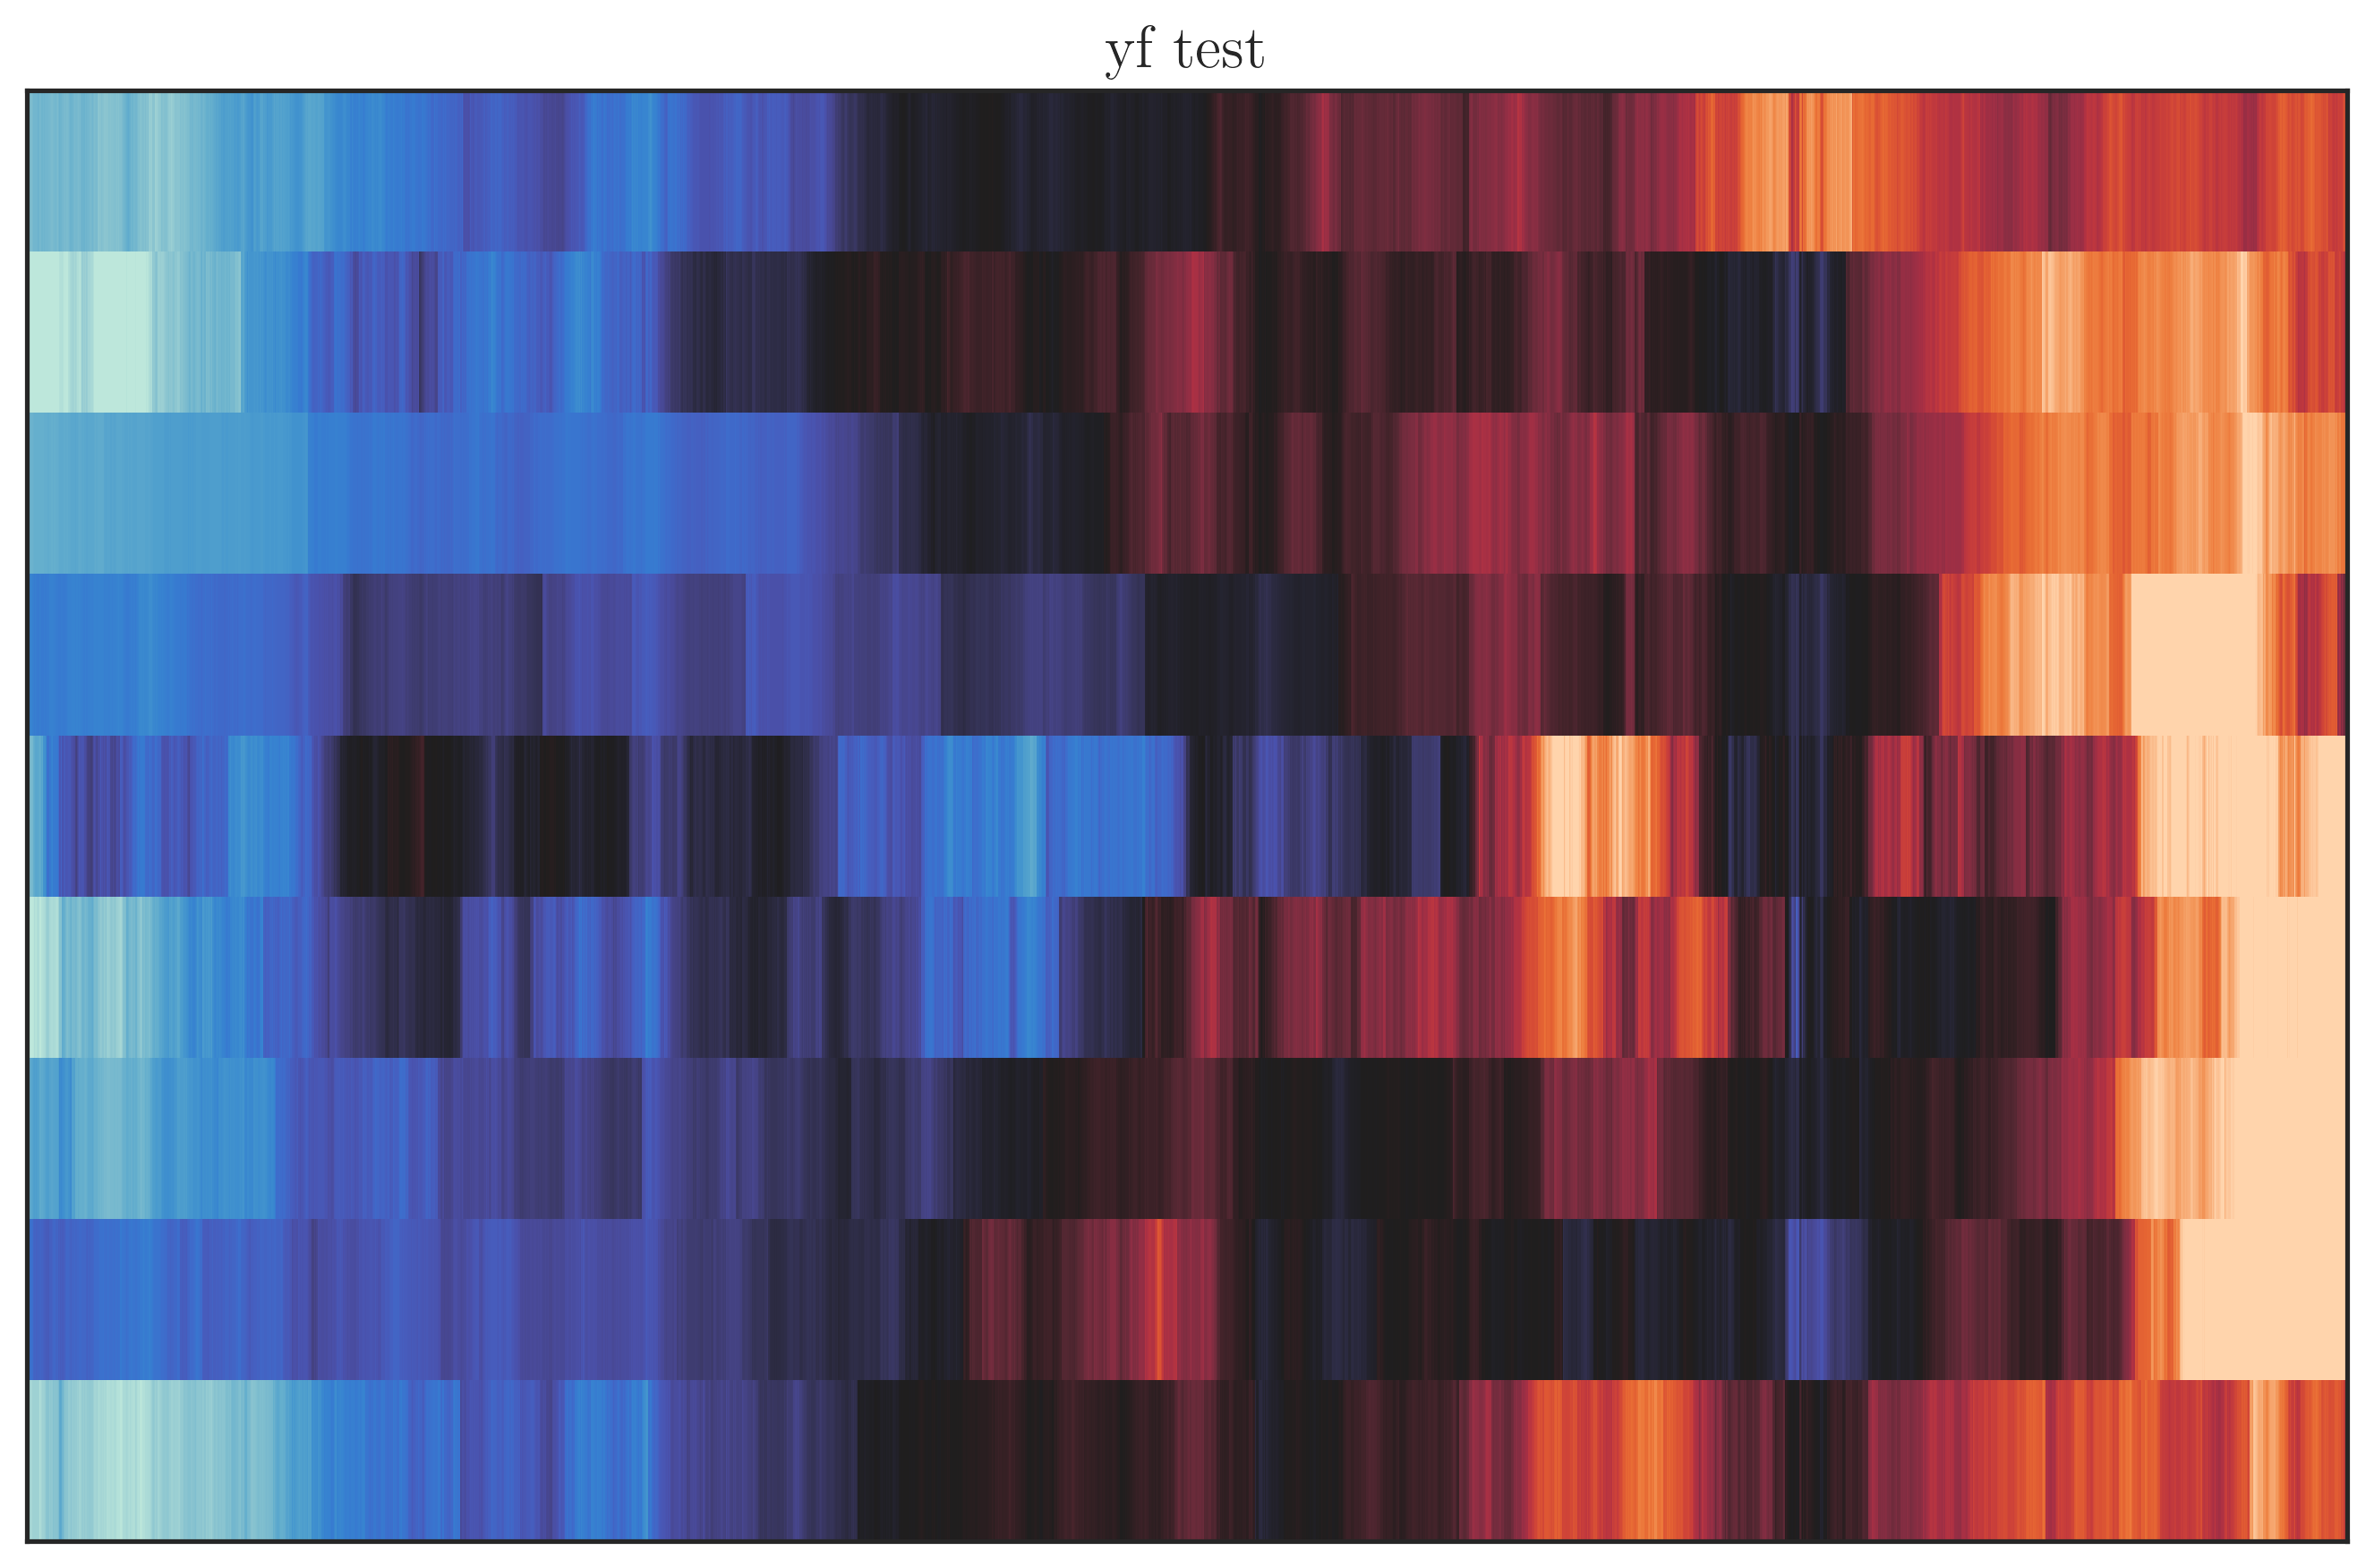

AAPL Log Returns Mean: 0.0000, Std: 1.0000, Max: 10.1505, Min: -13.8829


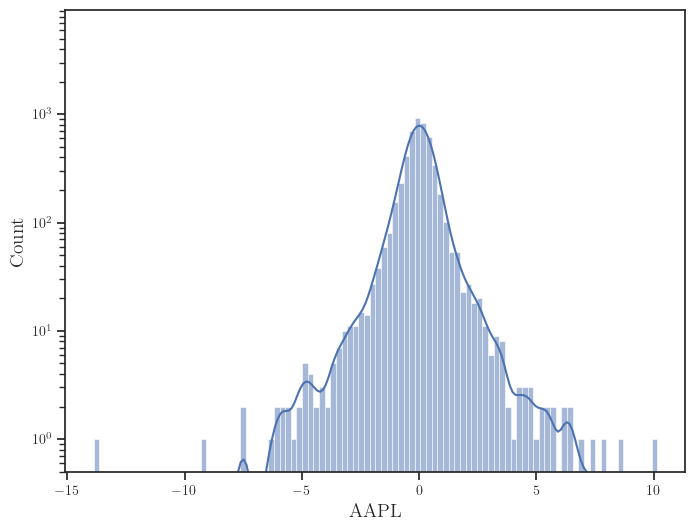

In [6]:
df_z = df_close.apply(zscore, axis=0)
df_log_returns = df_close.apply(lambda x: pd.Series(np.log(x) - np.log(x.shift(1)))).dropna()
df_z_log = (df_log_returns - df_log_returns.mean()) / df_log_returns.std()
X_stocks = df_z.T.values
plot_mts_heatmap(X_stocks, title="yf test")

df_aapl = df_z_log["AAPL"]
plt.figure(figsize=(8,6))
sns.histplot(df_aapl, kde=True, kde_kws={'bw_adjust': 1.5}, edgecolor="white", bins=100)
# plt.hist(df_aapl, bins=100, edgecolor="white")
plt.yscale("log")
plt.ylim(0.5, None)
print(f"AAPL Log Returns Mean: {df_aapl.mean():.4f}, Std: {df_aapl.std():.4f}, Max: {df_aapl.max():.4f}, Min: {df_aapl.min():.4f}")

In [ ]:
from aeon.datasets import load_classification

target_datasets = ['Heartbeat', 'MotorImagery', 'EigenWorms', 'SelfRegulationSCP1', 'SelfRegulationSCP2']

# Plot a standardized example per class for each target dataset
for name in target_datasets:
    X_train, y_train = load_classification(name, split='train')
    y_train = np.asarray(y_train)
    classes = pd.unique(y_train)
    for cls in classes:
        idx = int(np.nonzero(y_train == cls)[0][0])
        series = np.asarray(X_train[idx], dtype=float)
        series = zscore(series, axis=1, nan_policy='omit')
        series = np.nan_to_num(series, nan=0.0, posinf=0.0, neginf=0.0)
        title = f"{name} | class {cls} | sample {idx} | shape={series.shape}"
        plot_mts_heatmap(series, title=title)


Heartbeat | class normal | sample 34
Heartbeat | class normal | sample 28
Heartbeat | class normal | sample 15
Heartbeat | class normal | sample 17
Heartbeat | class normal | sample 45
Heartbeat | class abnormal | sample 173
Heartbeat | class abnormal | sample 130
Heartbeat | class abnormal | sample 150
Heartbeat | class abnormal | sample 189
Heartbeat | class abnormal | sample 146
MotorImagery | class finger | sample 192
MotorImagery | class finger | sample 228
MotorImagery | class finger | sample 68
MotorImagery | class finger | sample 262
MotorImagery | class finger | sample 150
MotorImagery | class tongue | sample 195
MotorImagery | class tongue | sample 212
MotorImagery | class tongue | sample 54
MotorImagery | class tongue | sample 230
MotorImagery | class tongue | sample 8
EigenWorms | class 1 | sample 15
EigenWorms | class 1 | sample 25
EigenWorms | class 1 | sample 22
EigenWorms | class 1 | sample 54
EigenWorms | class 1 | sample 4
EigenWorms | class 2 | sample 67
EigenWorms |

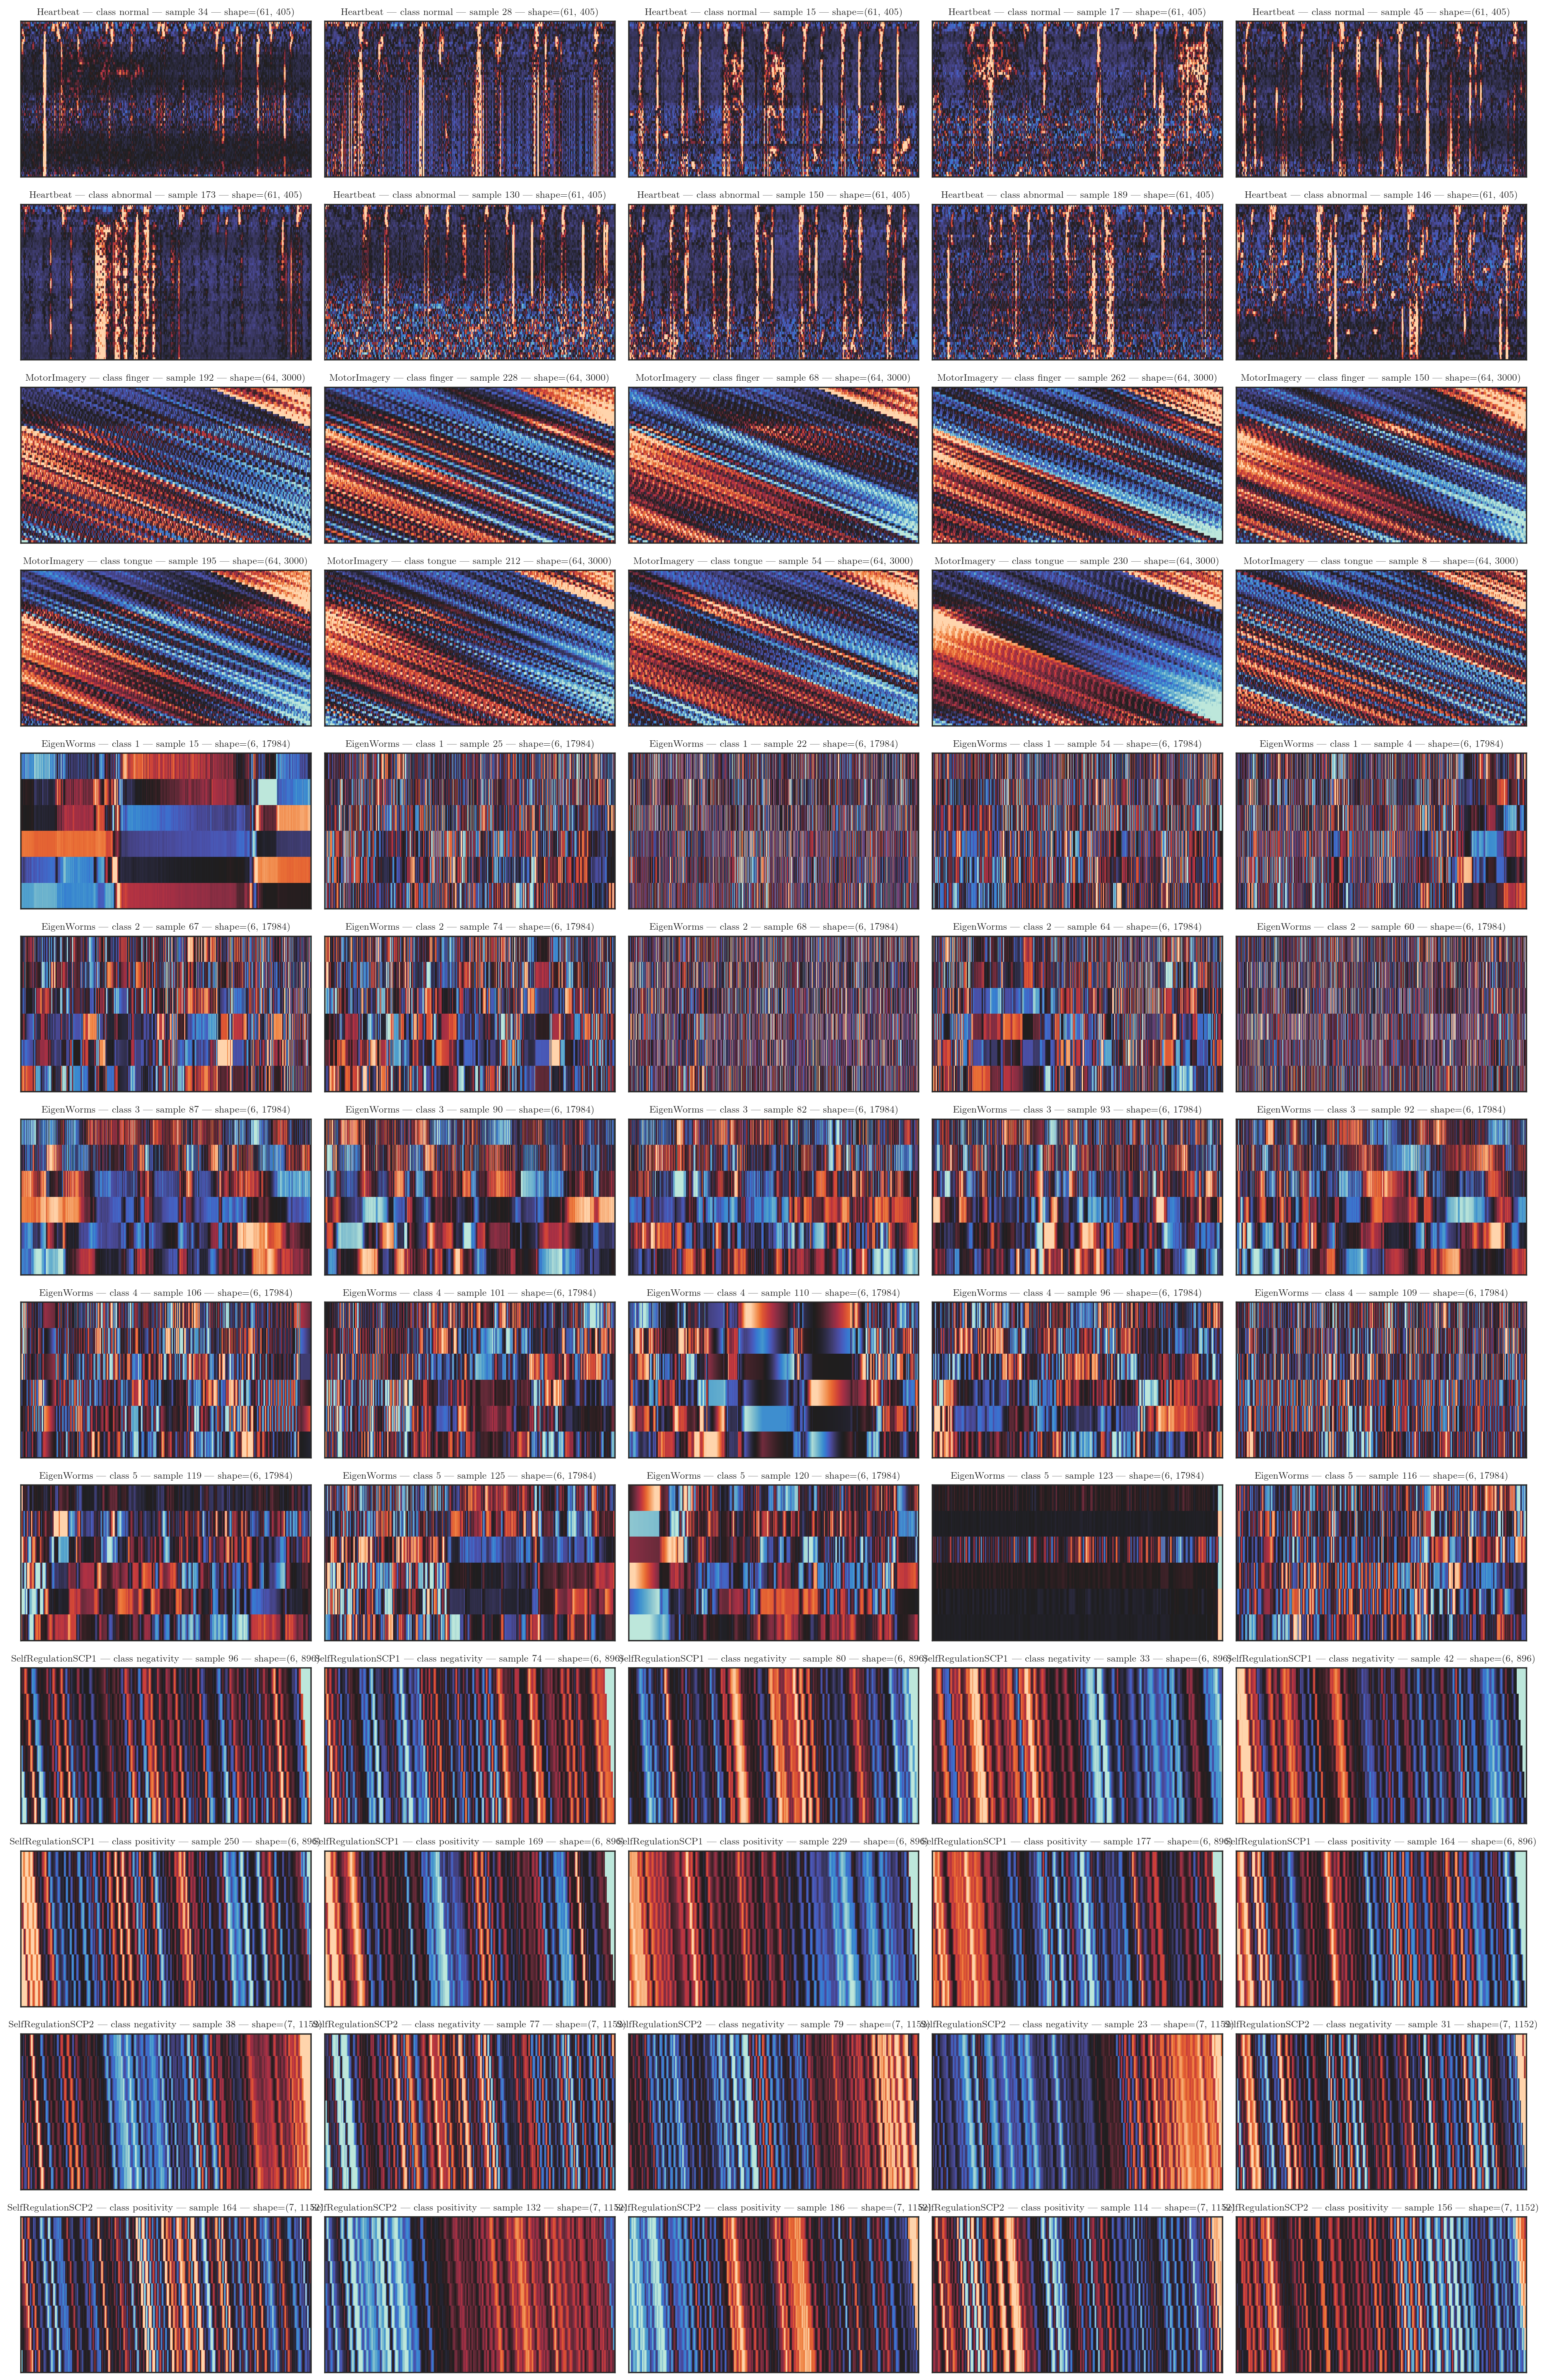

In [ ]:
from aeon.datasets import load_classification
import matplotlib.pyplot as plt

target_datasets = ['Heartbeat', 'MotorImagery', 'EigenWorms', 'SelfRegulationSCP1', 'SelfRegulationSCP2']
n_cols = 5
rng = np.random.default_rng(0)

def _heatmap_on_ax(ax, data, title):
    arr = np.asarray(data)
    if arr.ndim != 2:
        raise ValueError('MTS must be 2D')
    if arr.shape[0] > arr.shape[1]:
        arr = arr.T
    ax.pcolormesh(
        arr,
        shading='flat',
        vmin=-2,
        vmax=2,
        cmap=sns.color_palette('icefire', as_cmap=True),
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=9)

# Collect total rows = sum of classes across datasets
row_specs = []
for name in target_datasets:
    X_train, y_train = load_classification(name, split='train')
    y_train = np.asarray(y_train)
    classes = pd.unique(y_train)
    row_specs.append((name, X_train, y_train, classes))

n_rows = sum(len(classes) for (_, _, _, classes) in row_specs)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 2.4 * n_rows), dpi=200, squeeze=False)
row_idx = 0
for name, X_train, y_train, classes in row_specs:
    for cls in classes:
        idxs = np.nonzero(y_train == cls)[0]
        sample_count = min(len(idxs), n_cols)
        sampled = rng.choice(idxs, size=sample_count, replace=False)
        for col in range(n_cols):
            ax = axes[row_idx, col]
            if col >= sample_count:
                ax.axis('off')
                continue
            idx = int(sampled[col])
            series = np.asarray(X_train[idx], dtype=float)
            series = zscore(series, axis=1, nan_policy='omit')
            series = np.nan_to_num(series, nan=0.0, posinf=0.0, neginf=0.0)
            title = f"{name} | class {cls} | sample {idx} | shape={series.shape}"
            _heatmap_on_ax(ax, series, title=title)
            # print(f"{name} | class {cls} | sample {idx}")
        row_idx += 1
plt.tight_layout()
plt.show()
